### Importing dependencies and text preprocessing modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3  #### SQL Interface
import pickle   ### Used to save your data - Converts objects to byte stream and vice versa
import time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import BernoulliNB, MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


### Reading the cleaned sqlite file. 
###### (cleanning process show in previous file.)

In [2]:
conn = sqlite3.connect("final.sqlite")
final = pd.read_sql_query("""SELECT * FROM Reviews""" , conn)
conn.close()
final

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confect around centuri light pillowi citrus ge...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair taffi order five pound bag taffi...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,1,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,saltwat taffi great flavor soft chewi candi in...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,1,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,taffi good soft chewi flavor amaz would defini...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,1,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,right most sprout cat eat grass love rotat aro...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,healthi dog food good digest also good small p...


In [3]:
data = final[["Time" , "Score" , "CleanedText"]].copy()
data.sort_values("Time", inplace = True)
data.head(10)

,Time,Score,CleanedText
117879,939340800,1,witti littl book make son laugh loud recit car...
117856,940809600,1,rememb see show air televis year ago child sis...
298565,944092800,1,beetlejuic well written movi everyth excel act...
169198,944438400,1,twist rumplestiskin captur film star michael k...
298564,946857600,1,beetlejuic excel funni movi keaton hilari wack...
169259,947376000,1,one movi movi collect fill comedi action whate...
169184,948240000,0,alway enjoy movi funni entertain hesit pick cl...
63292,948672000,1,bought apart infest fruit fli hour trap quot a...
169284,951523200,1,happen say name three time michael keaten star...
298566,959990400,1,get crazi realli imposs today find french vhs ...


In [4]:
data["Score"].value_counts()

1    306779
0     57078
Name: Score, dtype: int64

In [5]:
del final

### Separating the target variable from the features:

In [6]:
x = data["CleanedText"]
y = data["Score"]


### Splitting the training and testing data:
(70:30 ratio)

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.3 , shuffle = False)


In [8]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((254699,), (109158,), (254699,), (109158,))

### Applying BOW vectorizer text preprocessing technique on training data:

In [9]:
BOW = CountVectorizer()
x_train = BOW.fit_transform(x_train.values)

In [10]:
x_train.shape

(254699, 63242)

### Applying BOW vectorizer text preprocessing technique on testing data:

In [11]:
x_test = BOW.transform(x_test.values)

In [12]:
x_test.shape

(109158, 63242)

### Performing cross validation to find the optimum value of alpha:

In [13]:
start = time.time()
alpha = np.linspace(1,10,10)
cv_score = [] 
for a in alpha:
    clf = MultinomialNB(alpha = a)
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
    cv_score.append(scores.mean())

cv_error = [1 - x for x in cv_score]

optimal_alpha = alpha[cv_error.index(min(cv_error))]
print('\nThe optimal alpha is', optimal_alpha)

end = time.time()
print("Total time in minutes = ", (end-start)/60)


The optimal alpha is 2.0
Total time in minutes =  0.535516349474589


### Plotting the optimum value of alpha:

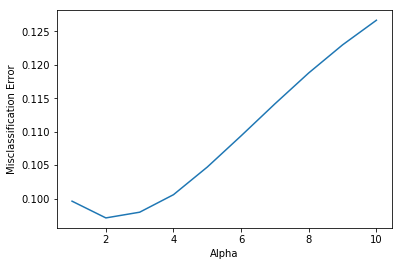

In [14]:
plt.plot(alpha, cv_error)
plt.xlabel('Alpha')
plt.ylabel('Misclassification Error')
plt.show()

### Displaying the output prediction using optimum value of alpha:

In [15]:
clf = MultinomialNB(alpha = optimal_alpha)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 89.61505340882024


array([[11863,  7203],
       [ 4133, 85959]], dtype=int64)

### Feature extraction of the top 50 negative and positive words respectively:

In [17]:
idx = (-clf.feature_log_prob_).argsort()[:2,:50]
print("Top 50 words in negative reviews")
for i in idx[0]:
    print(BOW.get_feature_names()[i])
    
print("\n******************************************\n")
print("Top 50 words in positive reviews")
for i in idx[1]:
    print(BOW.get_feature_names()[i])

Top 50 words in negative reviews
tast
like
product
one
flavor
would
tri
good
coffe
use
get
buy
order
food
tea
box
even
amazon
make
bag
much
time
eat
realli
look
love
packag
review
purchas
dog
bought
first
disappoint
bad
chocol
better
want
cup
price
also
think
know
sugar
could
made
water
say
drink
ingredi
well

******************************************

Top 50 words in positive reviews
like
tast
good
flavor
love
great
use
one
product
tea
tri
coffe
make
get
food
time
would
buy
amazon
eat
realli
find
price
best
also
much
order
littl
store
well
bag
drink
dog
even
mix
chocol
cup
better
year
day
sugar
recommend
sweet
box
high
found
water
free
treat
first


### Conclusion:
- Thus from above model we can see that our model predicts 89% of the points accurately along with this the top 50 poisitive and negative words can also be interpreted.